In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

In [38]:
datasets = [
        "adult",
        "german",
        "compas",
        "diabetes",
        "breast_cancer",
        ]

attack_list = [
        'deepfool', 
        'carlini_l_2', 
        # 'carlini_l_inf', 
        # 'lowprofool_l_2', 
        # 'lowprofool_l_inf', 
        # 'fgsm_l_1',
        # 'fgsm_l_2',
        'fgsm_l_inf',
        # 'bim',
        # 'mim',
        # 'pgd_l_1',
        # 'pgd_l_2',
        # 'pgd_l_inf',

        # 'boundary', 
        # 'hopskipjump_l_2', 'hopskipjump_l_inf'
        ]

def compare_cols(row):
    if row['ground_truth'] != row['adv_prediction']:
        return 1
    else:
        return 0

In [39]:
data_list_list=[]
for dataset in datasets:
    data_list = []
    for attack in attack_list:
        folder_name = f'{attack}_{dataset}'
        file_name_lr = f'eval_{folder_name}_lr_result_0.csv'
        result_path_lr = f'./results/{folder_name}/{file_name_lr}'
        file_name_nn = f'eval_{folder_name}_nn_2_result_0.csv'
        result_path_nn = f'./results/{folder_name}/{file_name_nn}'

        df1 = pd.read_csv(result_path_lr)
        # df2 = pd.read_csv("results/fgsm_l_2_adult/eval_fgsm_l_2_adult_svc_result_0.csv")
        df3 = pd.read_csv(result_path_nn)

        data1 = df1[['eval_L2', 'eval_Sen', 'eval_Mahalanobis', 'ground_truth', 'adv_prediction']]
        data1['model'] = 'LR'

        # data2 = df2[['eval_L2', 'prediction', 'adv_prediction']]
        # data2['model'] = 'SVM'

        data3 = df3[['eval_L2', 'eval_Sen', 'eval_Mahalanobis', 'ground_truth', 'adv_prediction']]
        data3['model'] = 'MLP'


        data = pd.concat([data1, data3], axis=0)
        data['attack'] = attack 
        data['dataset'] = dataset
        data_list.append(data)
    
    data_list_df = pd.concat(data_list, axis=0)

    data_list_df['attack_success'] = data_list_df.apply(compare_cols, axis=1)
    # data_list_df.to_csv(f'{dataset}_l2_success.csv')

    data_list_list.append(data_list_df)


C:\Users\n10599070\AppData\Local\Temp\ipykernel_22852\136101573.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['model'] = 'LR'
C:\Users\n10599070\AppData\Local\Temp\ipykernel_22852\136101573.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['model'] = 'MLP'
C:\Users\n10599070\AppData\Local\Temp\ipykernel_22852\136101573.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [40]:
data_list_list_df = pd.concat(data_list_list, axis=0)
data_list_list_df = data_list_list_df.astype({'eval_L2':float, 'eval_Sen':float, 'eval_Mahalanobis':float, 'attack_success': float})


In [44]:
data_list_list_df.to_csv(f'all_imp.csv')

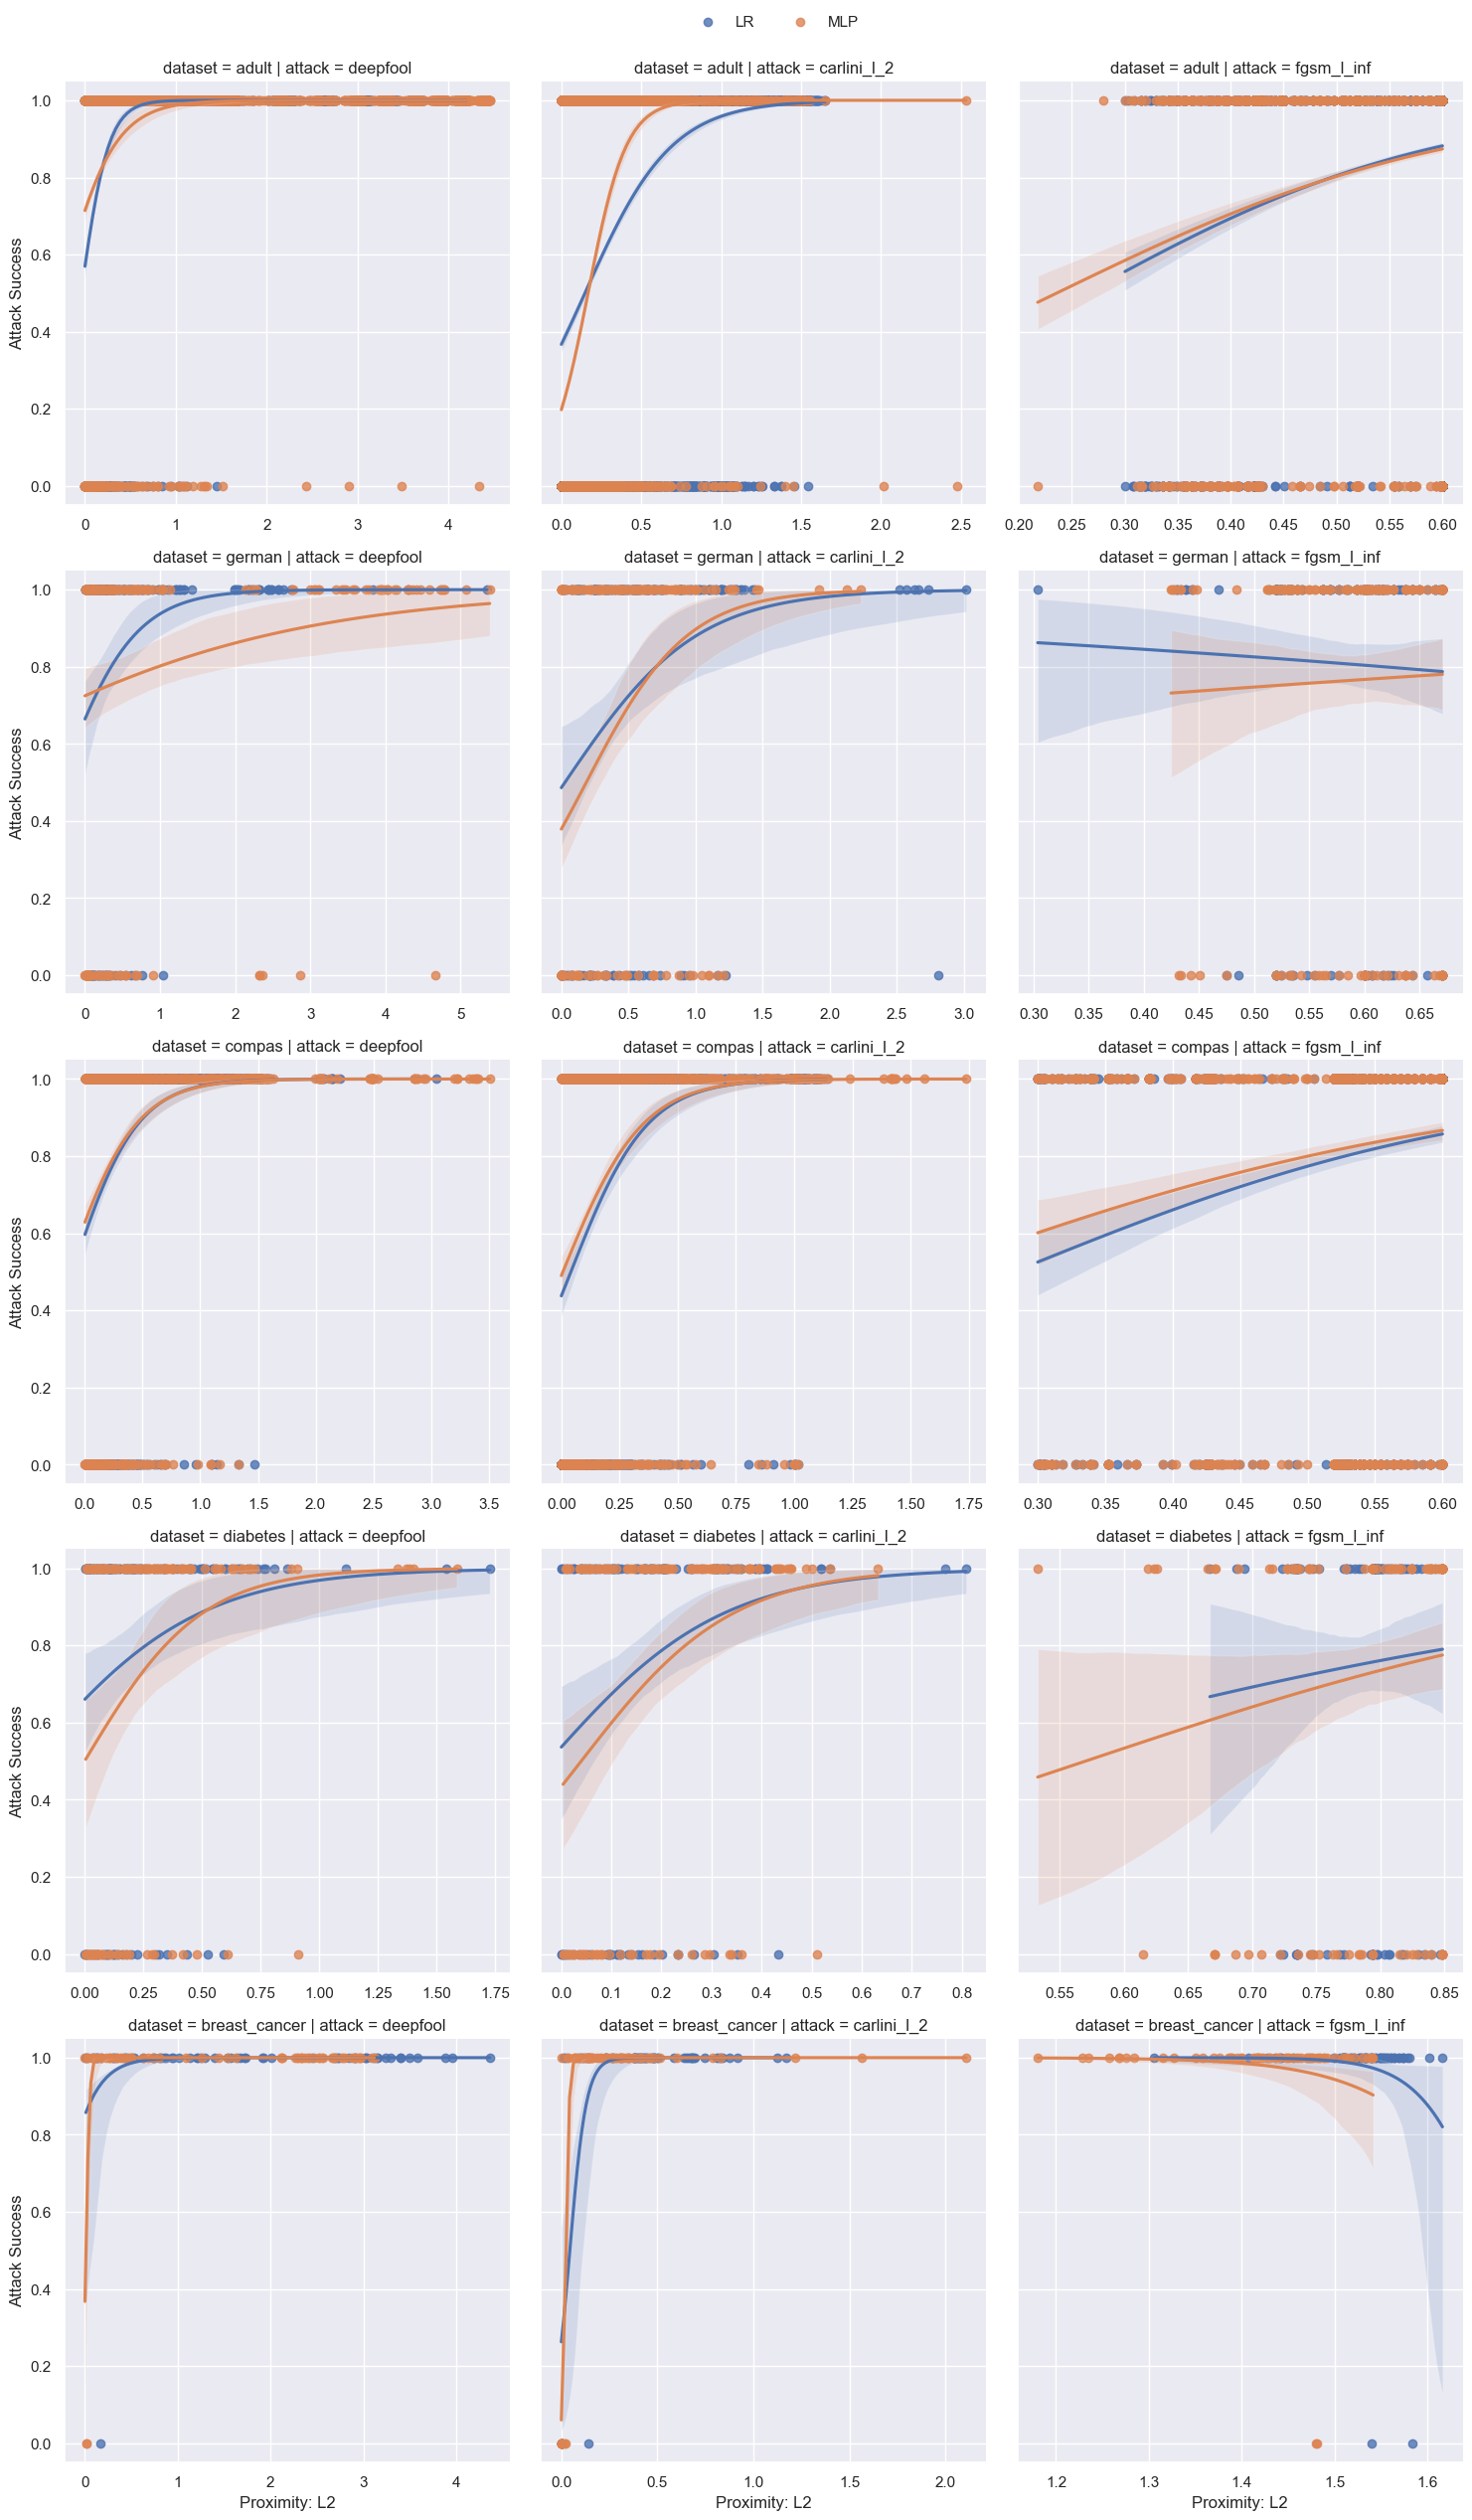

In [36]:

sns.set_theme()


# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=data_list_list_df,
    x="eval_L2", y="attack_success", 
    hue="model", col='attack', row='dataset',
    # height=5,
    logistic=True,
    facet_kws=dict(sharex=False, sharey=True),
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Proximity: L2", "Attack Success")
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
# g.set_titles("Dataset: Diabetes  Attack: FGSM Linf")
# g.set(title="Dataset: Diabetes  Attack: FGSM Linf")
# sns.plt.show()

In [ ]:

sns.set_theme()


# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=data_list_list_df,
    x="eval_L2", y="attack_success", 
    hue="model", col='attack', row='dataset',
    # height=5,
    logistic=True,
    facet_kws=dict(sharex=False, sharey=True),
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Proximity: L2", "Attack Success")
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
# g.set_titles("Dataset: Diabetes  Attack: FGSM Linf")
# g.set(title="Dataset: Diabetes  Attack: FGSM Linf")
# sns.plt.show()

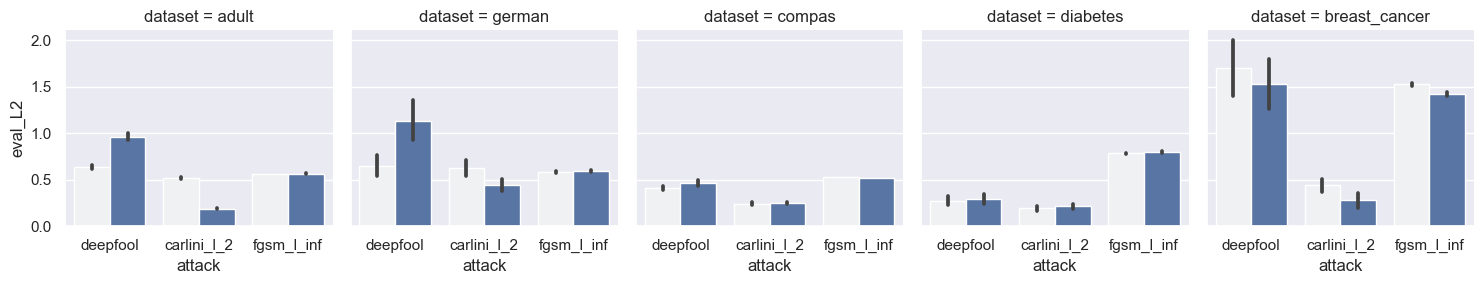

In [43]:
m = sns.FacetGrid(data=data_list_list_df, col='dataset')
m.map_dataframe(sns.barplot, x="attack", y="eval_L2", hue="model",)

# astype({'eval_L2':float, 'eval_Sen':float, 'eval_Mahalanobis':float, 'attack_success': float})